<div style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc; background-color: #F5F5F5; padding: 10px; border-radius: 10px; margin-bottom: 20px; position: relative;">


  <span style="color: #3369ff; font-weight: bold;">План нотбука</span>
  <ol>
    <li><a href="#1">Вступление</a></li>
    <li><a href="#2">Обработка данных </a></li>
    <li><a href="#3">EDA </a></li>
    <li><a href="#4">Text Preprocessing </a></li>
    <li><a href="#5">Model Training </a></li>
    <li><a href="#6">Заключение</a></li>
  </ol>
</div>


<a id="5"></a>
<div style="text-align: center; background:  #3369ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">1. Вступление</div>


<span style="font-size: 14px; font-family: Verdana; background-color: #F5F5F5; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  <strong>Вступление:</strong> Задача довольна известная, вообще задачи с текстом решаются очень просто с помощью эмбедингов из Bert и далее применением нейронки/ бустинга, однако бывает, что в силу специфики данных и текста, берт дает плохие эмбеддинги или наоборот существует модель попроще, малообъемная, которая легко может быть размещена на сервере и выполняет задачу не хуже. Для этого надо попробовать разные методы, посмотреть на данные, что дальше будет показано
</span>


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>1.1 | Импортируем нужные библиотеки для обрабоки данных</b></span>

In [2]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords    
nltk.download('stopwords')   
nltk.download('punkt')       
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt 
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirieshkins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kirieshkins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<div style="text-align: center; background: #3369ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">2. Обработка данных</div>


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>2.1 | Загружаем данные </b></span>

In [11]:
df = pd.read_csv('data/train_spam.csv', encoding='latin1')

In [12]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#3369ff")]}
])
styled_df

,text_type,text
0,ham,make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
1,ham,a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks
2,spam,plzz visit my website moviesgodml to get all movies for free and also i provide direct download links no redirect and adsððððð
3,spam,urgent your mobile number has been awarded with a Â£2000 prize guaranteed call 09061790121 from land line claim 3030 valid 12hrs only 150ppm
4,ham,overview of hr associates analyst project per david s request attached is an overview of the hr associates analysts project creating a human resource value index this document will provide a brief top line overview of the following description of the challenges people involved positive outcomes high level description of the process we suggest if you have any questions before our tuesday meeting please contact either myself or dan brown thanks tana cashion david oxley ect 10 05 2000 10 20 am to gerry gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim o rourke corp enron enron ted c bland hou ect ect daniel brown na enron enron tana cashion na enron enron rhonna palmer hou ect ect cindy


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>2.2 | Data Info</b></span>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [14]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#3369ff"), ('font-weight', 'bold')]}
])


,text_type,text
0,ham,make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
1,ham,a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks
2,spam,plzz visit my website moviesgodml to get all movies for free and also i provide direct download links no redirect and adsððððð
3,spam,urgent your mobile number has been awarded with a Â£2000 prize guaranteed call 09061790121 from land line claim 3030 valid 12hrs only 150ppm
4,ham,overview of hr associates analyst project per david s request attached is an overview of the hr associates analysts project creating a human resource value index this document will provide a brief top line overview of the following description of the challenges people involved positive outcomes high level description of the process we suggest if you have any questions before our tuesday meeting please contact either myself or dan brown thanks tana cashion david oxley ect 10 05 2000 10 20 am to gerry gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim o rourke corp enron enron ted c bland hou ect ect daniel brown na enron enron tana cashion na enron enron rhonna palmer hou ect ect cindy


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>2.3 | LabelEncoder для кодировки таргета</b></span>

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['text_type'] = encoder.fit_transform(df['text_type'])

In [16]:
styled_df = df.head().style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#3369ff"), ('font-weight', 'bold')]}
])


,text_type,text
0,0,make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
1,0,a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks
2,1,plzz visit my website moviesgodml to get all movies for free and also i provide direct download links no redirect and adsððððð
3,1,urgent your mobile number has been awarded with a Â£2000 prize guaranteed call 09061790121 from land line claim 3030 valid 12hrs only 150ppm
4,0,overview of hr associates analyst project per david s request attached is an overview of the hr associates analysts project creating a human resource value index this document will provide a brief top line overview of the following description of the challenges people involved positive outcomes high level description of the process we suggest if you have any questions before our tuesday meeting please contact either myself or dan brown thanks tana cashion david oxley ect 10 05 2000 10 20 am to gerry gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim o rourke corp enron enron ted c bland hou ect ect daniel brown na enron enron tana cashion na enron enron rhonna palmer hou ect ect cindy


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>2.4 |Проверка на пустые строчки</b></span>

In [9]:
df.isnull().sum()

text_type    0
text         0
dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;;'><b>2.5 | Дубликаты</b></span>

In [10]:
df.duplicated().sum()

11

In [11]:
df = df.drop_duplicates(keep = 'first')

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="5"></a>
<div style="text-align: center; background:  #3369ff;; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3. EDA</div>


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>3.1 | Доля Ham and Spam</b></span>

In [12]:
values = df['text_type'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 70.4370812073523
percentage of 1 : 29.56291879264769


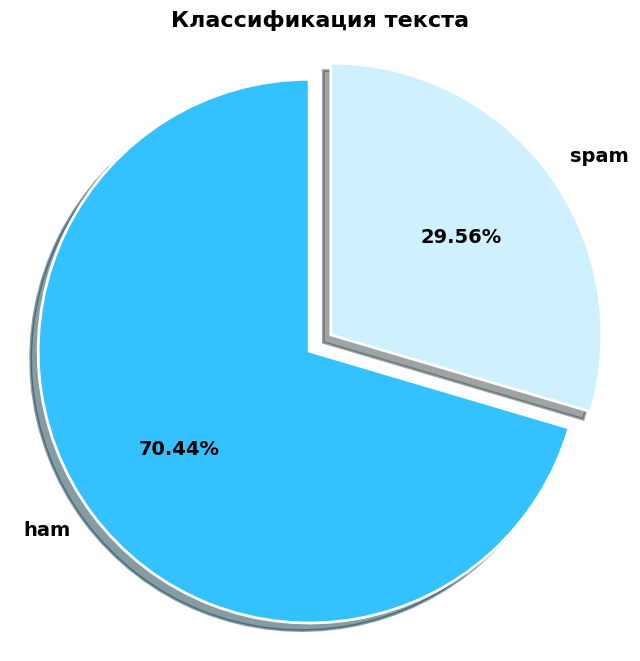

In [13]:
colors = ['#33c2ff', '#cff1ff']
explode = (0, 0.1)  

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')


wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode, 
    shadow=True  
)


for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Классификация текста', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


Как видно на графике, процент  ham слишком высок (70.44%) по сравнению с процентом спам-сообщений. Таким образом, данные являются несбалансированными.

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>3.2 | Анализ текста</b></span>

In [144]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [145]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,16267.000000,16267.000000,16267.000000
mean,326.527448,57.477839,1.062212
std,305.210642,52.431640,0.376116
min,1.000000,1.000000,1.000000
25%,60.000000,12.000000,1.000000
50%,162.000000,32.000000,1.000000
75%,669.000000,115.000000,1.000000
max,2584.000000,604.000000,12.000000


> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>3.3 | Статистика для нормальных текстов</b></span>

In [16]:
#ham
df[df['text_type'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,11458.000000,11458.000000,11458.000000
mean,314.582737,58.359400,1.039012
std,307.364063,55.836571,0.334452
min,1.000000,1.000000,1.000000
25%,41.000000,9.000000,1.000000
50%,141.000000,28.000000,1.000000
75%,686.000000,124.000000,1.000000
max,1545.000000,181.000000,12.000000


> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>3.4 | Статистика для спама</b></span>

In [17]:
#spam
df[df['text_type'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4809.000000,4809.000000,4809.000000
mean,354.987108,55.377417,1.117488
std,298.126506,43.184914,0.455741
min,5.000000,1.000000,1.000000
25%,139.000000,24.000000,1.000000
50%,225.000000,37.000000,1.000000
75%,558.000000,80.000000,1.000000
max,2584.000000,604.000000,10.000000


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>3.5 |  Распределение длины токенов для норм/ненорм текстов</b></span>

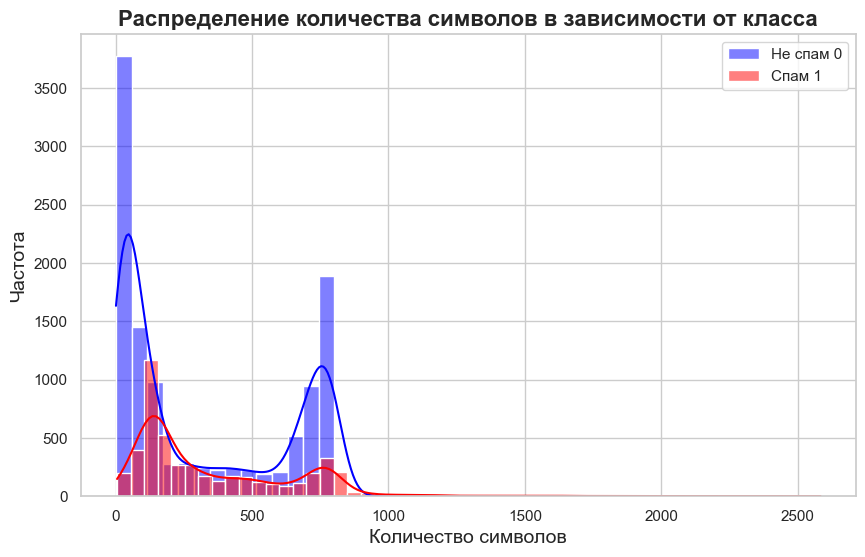

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[df['text_type'] == 0]['num_characters'], color='blue', label='Не спам 0', kde=True)
sns.histplot(df[df['text_type'] == 1]['num_characters'], color='red', label='Спам 1', kde=True)

plt.xlabel('Количество символов', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Распределение количества символов в зависимости от класса', fontsize=16, fontweight='bold')
plt.legend()

sns.set(style='whitegrid')  
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>3.6 | Распределение количества слов для норм/ненорм текстов</b></span>

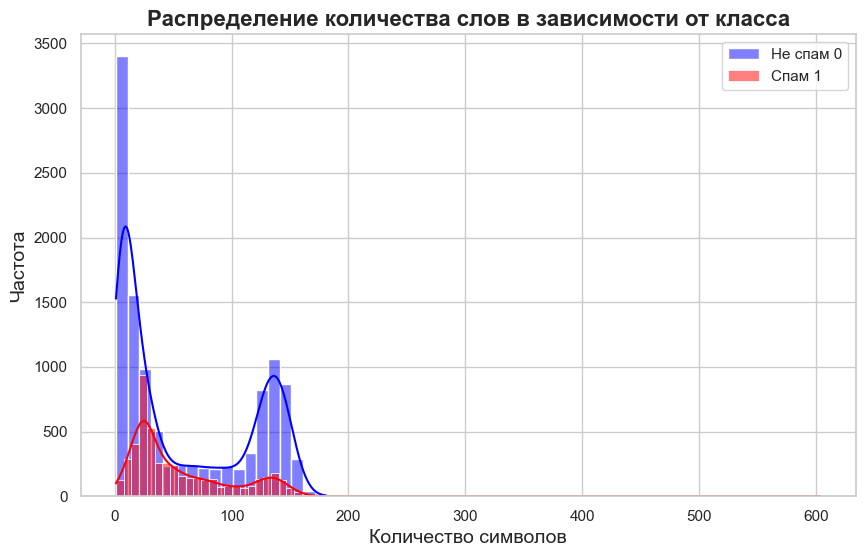

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['text_type'] == 0]['num_words'], color='blue', label='Не спам 0', kde=True)
sns.histplot(df[df['text_type'] == 1]['num_words'], color='red', label='Спам 1', kde=True)

plt.xlabel('Количество символов', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Распределение количества слов в зависимости от класса', fontsize=16, fontweight='bold')
plt.legend()

sns.set(style='whitegrid') 
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>3.7 | Pairplot для визуализации</b></span>

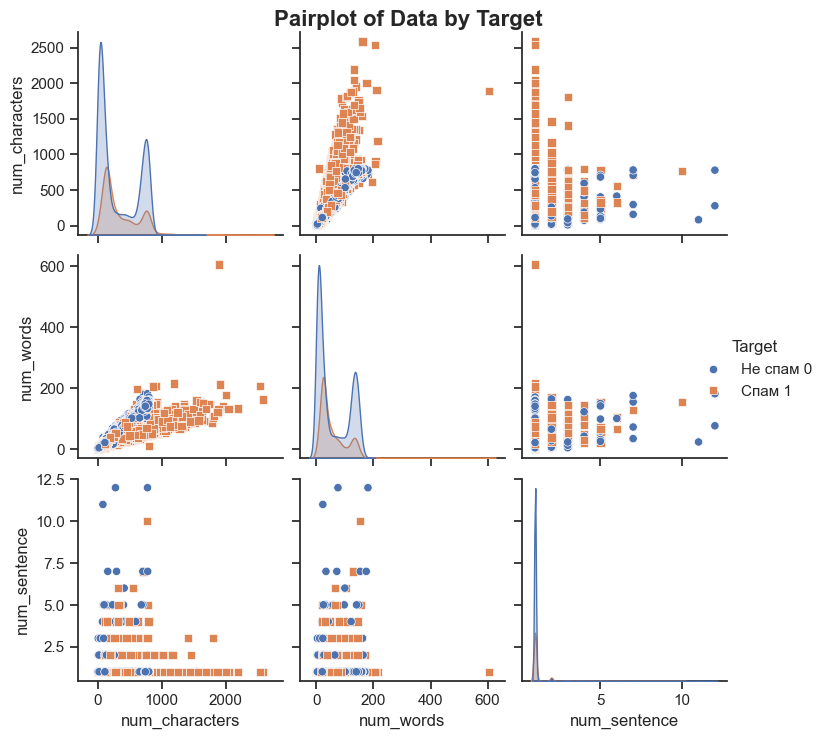

In [22]:

sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='text_type', diag_kind='kde', markers=["o", "s"])


g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  

g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Не спам 0", "Спам 1"]):
    t.set_text(l)

plt.show()

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>3.8 | Корреляция</b></span>

In [23]:
df[['text_type','num_characters', 'num_words', 'num_sentence']].corr()

,text_type,num_characters,num_words,num_sentence
text_type,1.000000,0.060411,-0.025954,0.095214
num_characters,0.060411,1.000000,0.951107,-0.041422
num_words,-0.025954,0.951107,1.000000,-0.031900
num_sentence,0.095214,-0.041422,-0.031900,1.000000


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="6"></a>
<div style="text-align: center; background: #3369ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">4. Text Preprocessing </div>


In [3]:

from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):

    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [25]:
transform_text('Dude i like ML, texts')

'dude like ml text'

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>4.1 | Новая колонка 'transformed_text'</b></span>

In [146]:
df['transformed_text'] = df['text'].apply(transform_text)

In [147]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#3369ff"), ('font-weight', 'bold')]}
])


,text_type,text,num_characters,num_words,transformed_text,num_sentence
0,0,make sure alex knows his birthday is over in fifteen minutes as far as youre concerned,86,16,make sure alex know birthday fifteen minut far your concern,1
1,0,a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc vince j kaminski hou ect ect subject a resume for john lavorato molly please make arrangements for the interview with this candidate for a trading position interviews with john lavorato jeff shankman gary hickerson stinson gibner i talked to him in new york and he is considering other opportunities so we have to act fast i think john will like him more than punit thanks,520,97,resum john lavorato thank vinc get move right away molli vinc j kaminski 02 21 2001 05 55 pm molli mage hou ect ect cc vinc j kaminski hou ect ect subject resum john lavorato molli pleas make arrang interview candid trade posit interview john lavorato jeff shankman gari hickerson stinson gibner talk new york consid opportun act fast think john like punit thank,1
2,1,plzz visit my website moviesgodml to get all movies for free and also i provide direct download links no redirect and adsððððð,141,22,plzz visit websit moviesgodml get movi free also provid direct download link redirect,1
3,1,urgent your mobile number has been awarded with a Â£2000 prize guaranteed call 09061790121 from land line claim 3030 valid 12hrs only 150ppm,140,23,urgent mobil number award prize guarante call 09061790121 land line claim 3030 valid 12hr 150ppm,1
4,0,overview of hr associates analyst project per david s request attached is an overview of the hr associates analysts project creating a human resource value index this document will provide a brief top line overview of the following description of the challenges people involved positive outcomes high level description of the process we suggest if you have any questions before our tuesday meeting please contact either myself or dan brown thanks tana cashion david oxley ect 10 05 2000 10 20 am to gerry gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim o rourke corp enron enron ted c bland hou ect ect daniel brown na enron enron tana cashion na enron enron rhonna palmer hou ect ect cindy,733,127,overview hr associ analyst project per david request attach overview hr associ analyst project creat human resourc valu index document provid brief top line overview follow descript challeng peopl involv posit outcom high level descript process suggest question tuesday meet pleas contact either dan brown thank tana cashion david oxley ect 10 05 2000 10 20 gerri gibson corp enron enron cc andrea yowman corp enron enron bob sparger corp enron enron tim rourk corp enron enron ted c bland hou ect ect daniel brown na enron enron tana cashion na enron enron rhonna palmer hou ect ect cindi,1


> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>4.2 | Word Cloud for Spam </b></span>

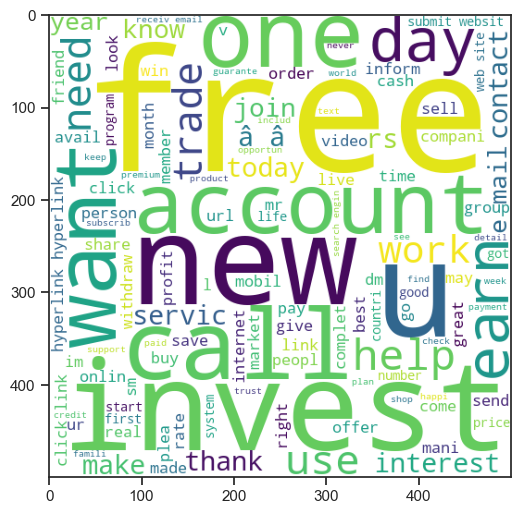

In [28]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['text_type'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>4.3 | Word Cloud for Not spam</b></span>

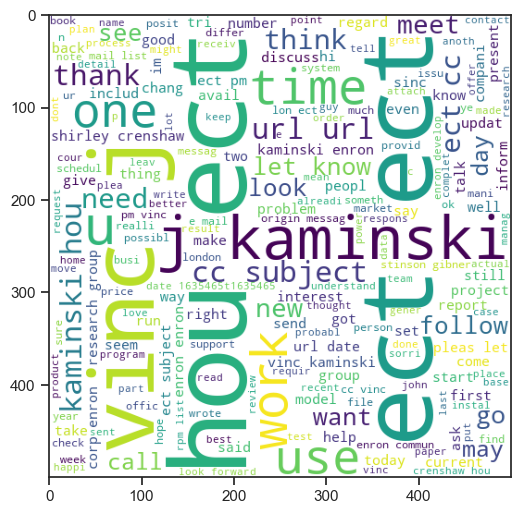

In [29]:
ham_wc = wc.generate(df[df['text_type'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>4.4 | Top 30 spam</b></span>

In [30]:
spam_carpos = []
for sentence in df[df['text_type'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [31]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\Kirieshkins\AppData\Local\Temp\ipykernel_10904\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


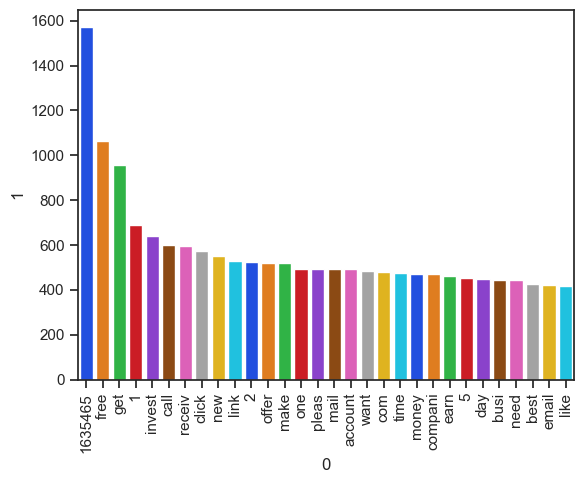

In [32]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>4.5 | Top 30 Not spam </b></span>

In [33]:
ham_carpos = []
for sentence in df[df['text_type'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [34]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\Kirieshkins\AppData\Local\Temp\ipykernel_10904\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


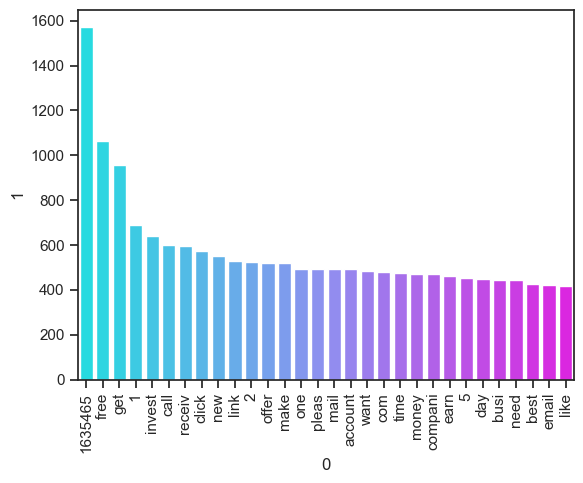

In [35]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="7"></a>
<div style="text-align: center; background: linear-gradient(to right,#3369ff, #3369ff); font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">5. Model Trainning</div>


<span style="font-size: 14px; font-family: Verdana; background-color: #F5F5F5; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  <strong>План:</strong> Прежде чем пробовать берт, глянем на более простые модели, сходу скажу, что кэтбуст перебьет все модели и в плане инференса он быстр. Текст возьмем из tfidf и будем брать модели с изначальными параметрами, без подбора, посмотрим, что выйдет
</span>


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.1 |   Импортируем  TfidfVectorizer</b></span>

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfid = TfidfVectorizer(max_features = 3000)

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.2 | Трансформ на текст</b></span>

In [50]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['text_type'].values

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>5.3 | Split into Train and Test Data</b></span>

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>5.4 | Импортируем модели</b></span>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import Pool, CatBoostClassifier

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>5.5 | Инициализируем модели</b></span>

In [56]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 100, random_state = 2 , n_jobs = -1)  
cat = CatBoostClassifier(iterations=1000, verbose = False,
                           task_type="GPU",
                           devices='0')

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>5.6 | Dict из моделей для удобства</b></span>

In [57]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'LR': lrc,
    'RF': rfc,
    'cat': cat
    
}

> <span style='font-size:15px; font-family:Verdana;color:#3369ff;'><b>5.7 | Train the Models</b></span>

In [58]:
from sklearn.metrics import roc_auc_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    return  roc_auc

In [59]:

roc_auc= []
for name , clfs in clfs.items():
    current_roc_auc = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print(" ROC_AUC: ", current_roc_auc)
    roc_auc.append(current_roc_auc)
    


For:  SVC
 ROC_AUC:  0.8870390981420669

For:  KNN
 ROC_AUC:  0.6249701547910284

For:  LR
 ROC_AUC:  0.8774656734181121

For:  RF
 ROC_AUC:  0.9038676635884778

For:  cat
 ROC_AUC:  0.864137721405535


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.8 |Обучим Кэтбуст с внутренним представлением текстов</b></span>

In [149]:
df = df.drop(['num_sentence'], axis = 1)
# этот признак совсем бесполезный, остальные +- дают вклад

In [165]:
# Подготовка данных для кэтбуста
learn, test = train_test_split(df,test_size = 0.20, random_state = 2)
text_features = ['transformed_text']
cat_features= ['num_characters', 'num_words']
auxiliary_columns = ['text']
def get_processed_dataset():
    
    def fill_na(df, features):
        for feature in features:
            df[feature].fillna('', inplace=True)

    def preprocess_data_part(data_part):
        data_part = data_part.drop(auxiliary_columns, axis=1)
        
        fill_na(data_part, cat_features)
        fill_na(data_part, text_features)

        X = data_part.drop(['text_type'], axis=1)
        y = data_part['text_type']
        return X, y
    
    X_learn, y_learn = preprocess_data_part(learn)
    X_test, y_test = preprocess_data_part(test)

    return X_learn, X_test, y_learn, y_test

X_train, X_test, y_train, y_test = get_processed_dataset()

In [151]:
def fit_catboost(X_train, X_test, y_train, y_test, catboost_params={}, verbose=100):
    learn_pool = Pool(
        X_train, 
        y_train,
        text_features = text_features,
    )
    test_pool = Pool(
        X_test, 
        y_test,
        text_features = text_features,
    )
    
    catboost_default_params = {
        'iterations': 1000,
        'eval_metric': 'AUC',
    }
    
    catboost_default_params.update(catboost_params)
    
    model = CatBoostClassifier(**catboost_default_params)
    model.fit(learn_pool, eval_set=test_pool, verbose=verbose)

    return model

model = fit_catboost(X_train, X_test, y_train, y_test)

Learning rate set to 0.059726
0:	test: 0.9324927	best: 0.9324927 (0)	total: 27.1ms	remaining: 27.1s
100:	test: 0.9847103	best: 0.9847103 (100)	total: 4.02s	remaining: 35.8s
200:	test: 0.9866739	best: 0.9866739 (200)	total: 8.09s	remaining: 32.1s
300:	test: 0.9877293	best: 0.9877747 (296)	total: 12.1s	remaining: 28.2s
400:	test: 0.9881058	best: 0.9881480 (396)	total: 16.1s	remaining: 24s
500:	test: 0.9883454	best: 0.9883454 (497)	total: 20.2s	remaining: 20.1s
600:	test: 0.9886276	best: 0.9886386 (572)	total: 24.1s	remaining: 16s
700:	test: 0.9889219	best: 0.9889371 (688)	total: 28.1s	remaining: 12s
800:	test: 0.9891184	best: 0.9891359 (799)	total: 32.1s	remaining: 7.98s
900:	test: 0.9892185	best: 0.9892222 (894)	total: 35.9s	remaining: 3.95s
999:	test: 0.9892585	best: 0.9892585 (999)	total: 39.9s	remaining: 0us

bestTest = 0.9892584797
bestIteration = 999



Даже без перебора параметров, 0.99 на тесте, пробовал обучить с доп признаками (количество слов, символов) и без, с доп признаками на 0.012 качество лучше, поэтому оставлю с ними

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.9 |Перебор параметров Random_Search</b></span>

In [152]:
def fill_na(df, features):
        for feature in features:
            df[feature].fillna('', inplace=True)

def preprocess_data_part(data_part):
    data_part = data_part.drop(auxiliary_columns, axis=1)
    
    fill_na(data_part, cat_features)
    fill_na(data_part, text_features)

    X = data_part.drop(['text_type'], axis=1)
    y = data_part['text_type']
    return X, y

X, y = preprocess_data_part(df)

In [74]:


model = CatBoostClassifier(verbose = False, text_features = ['transformed_text'],eval_metric = 'AUC')


grid = {'learning_rate': [0.01 , 0.06, 0.1, 0.006],
        'depth': [2, 5, 7, 10],
        'l2_leaf_reg': [0.001, 0.1, 0.5, 1],
        'iterations': [500, 800, 1000, 1200],
       }

randomized_search_result = model.randomized_search(grid,
                                                   X=X,
                                                   y=y,
                                                   plot=True,
                                                   cv =4)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8360497947
bestIteration = 761

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8360498	best: 0.8360498 (0)	total: 2.16s	remaining: 19.4s

bestTest = 0.8145437065
bestIteration = 796

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8145437	best: 0.8360498 (0)	total: 4.18s	remaining: 16.7s

bestTest = 0.8355483807
bestIteration = 741

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8355484	best: 0.8360498 (0)	total: 6.65s	remaining: 15.5s

bestTest = 0.8349746929
bestIteration = 1157

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8349747	best: 0.8360498 (0)	total: 9.62s	remaining: 14.4s

be

In [79]:
randomized_search_result['params']

{'depth': 10, 'learning_rate': 0.06, 'l2_leaf_reg': 1, 'iterations': 1000}

In [153]:
model = fit_catboost(X_train, X_test, y_train, y_test, catboost_params= randomized_search_result['params'])

0:	test: 0.9324318	best: 0.9324318 (0)	total: 173ms	remaining: 2m 53s
100:	test: 0.9857388	best: 0.9857388 (100)	total: 16.4s	remaining: 2m 25s
200:	test: 0.9875952	best: 0.9876232 (197)	total: 32.4s	remaining: 2m 8s
300:	test: 0.9891859	best: 0.9891859 (300)	total: 48.5s	remaining: 1m 52s
400:	test: 0.9895973	best: 0.9896006 (396)	total: 1m 4s	remaining: 1m 36s
500:	test: 0.9898861	best: 0.9898861 (500)	total: 1m 20s	remaining: 1m 20s
600:	test: 0.9901199	best: 0.9901286 (597)	total: 1m 36s	remaining: 1m 3s
700:	test: 0.9901979	best: 0.9902443 (640)	total: 1m 52s	remaining: 47.9s
800:	test: 0.9902879	best: 0.9902893 (787)	total: 2m 8s	remaining: 31.9s
900:	test: 0.9902728	best: 0.9903425 (861)	total: 2m 24s	remaining: 15.9s
999:	test: 0.9903458	best: 0.9903540 (996)	total: 2m 40s	remaining: 0us

bestTest = 0.9903540285
bestIteration = 996

Shrink model to first 997 iterations.


In [154]:
model.save_model('best_roc_0.99')

> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.9 | Можно попробовать получить эмбеддинги с помощью Фасттекста</b></span>

In [ ]:
# Здесь я использую gensim, хотя надо признать, что библиотеки facebook/ gemsim уже не поддерживаются
from gensim.models import FastText
from gensim.test.utils import common_texts
common_texts = df['transformed_text'].values
# перебор параметров дает +- одинаковые результаты
model = FastText(vector_size=100, window=20, min_count=5) 
model.build_vocab(corpus_iterable=common_texts)
model.train(corpus_iterable=common_texts, total_examples=len(common_texts), epochs=100)
embeddings = np.array([model.wv[sentence] for sentence in df['transformed_text'].values])

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>5.10 | Лучший бейзлайн кэтбуст</b></span>

In [62]:
X_train, X_test , y_train, y_test = train_test_split(embeddings,y, stratify = y, test_size = 0.20, random_state = 2)
model = fit_catboost(X_train, X_test, y_train, y_test)

Learning rate set to 0.059726
0:	test: 0.6046574	best: 0.6046574 (0)	total: 78.1ms	remaining: 1m 18s
100:	test: 0.8009691	best: 0.8009691 (100)	total: 3.2s	remaining: 28.5s
200:	test: 0.8240486	best: 0.8240486 (200)	total: 6.24s	remaining: 24.8s
300:	test: 0.8360600	best: 0.8360600 (300)	total: 9.19s	remaining: 21.3s
400:	test: 0.8447492	best: 0.8447492 (400)	total: 12.2s	remaining: 18.3s
500:	test: 0.8493368	best: 0.8493368 (500)	total: 15.2s	remaining: 15.2s
600:	test: 0.8532893	best: 0.8533818 (593)	total: 18.3s	remaining: 12.1s
700:	test: 0.8563466	best: 0.8563466 (700)	total: 21.6s	remaining: 9.19s
800:	test: 0.8578972	best: 0.8582088 (790)	total: 24.8s	remaining: 6.16s
900:	test: 0.8596569	best: 0.8597658 (895)	total: 27.9s	remaining: 3.06s
999:	test: 0.8610289	best: 0.8611327 (996)	total: 30.9s	remaining: 0us

bestTest = 0.8611327296
bestIteration = 996

Shrink model to first 997 iterations.


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

Результат хуже, скорее всего фасттекст тут слаб, его долго обучать, и так как тексты большие окно должно быть тоже высоким

<a id="9"></a>
<div style="text-align: center; background: #3369ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">6. Заключение</div>


<span style="font-size: 14px; font-family: Verdana; background-color: #F5F5F5; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  <strong>Conclusion:</strong> Суммаризируем полученные реузльтаты:

  - Лучшая модель Catboost с AUC <span style="background-color: yellow; font-weight: bold;">99.06%</span>, с внутренней обработкой текста, другие варианты уменьшают скор
  - Random Forest (RF) показал хороший результат около <span style="background-color: yellow; font-weight: bold;">90.0%</span>
  - Другие модели дают относительно неплохой результат в интервале  <span style="background-color: yellow; font-weight: bold;">86.21%</span> до <span style="background-color: yellow; font-weight: bold;">88.74%</span>.
  

Для инференса выбираем  Catboost 

Была еще пара вариантов для теста, например Pool LSTM, обучить Catboost на эмбеддингах с Bert, однако важно выбрать не только по скору, но и по скорости инференса, поэтому Bert не стал пробовать, по опыту LSTM очень редко дает хороший результат, так что ее тоже не буду пробовать.
</span>


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>6.1 | Инференс и сабмит</b></span>

In [25]:
test = pd.read_csv('data/test_spam.csv', encoding='latin1')

In [21]:
text_features = ['transformed_text']
cat_features= ['num_characters', 'num_words']
auxiliary_columns = ['text']
def inference(data):
    data['num_characters'] = data['text'].apply(len)
    data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
    data['transformed_text'] = data['text'].apply(transform_text)
    def fill_na(df, features):
            for feature in features:
                df[feature].fillna('', inplace=True)

    def preprocess_data_part(data_part):
        data_part = data_part.drop(auxiliary_columns, axis=1)
        
        fill_na(data_part, cat_features)
        fill_na(data_part, text_features)

        X = data_part
        return X

    features = preprocess_data_part(data)
    randomized_search_result = {'depth': 10, 'learning_rate': 0.06, 'l2_leaf_reg': 1, 'iterations': 1000}
    clf = CatBoostClassifier(**randomized_search_result)
    clf.load_model('best_roc_0.99')
    return clf.predict(features)
    

In [26]:
y_pred = inference(test)

In [27]:

test['score'] = encoder.inverse_transform(y_pred)
test = test.drop( cat_features+ text_features, axis = 1)
test = test.reindex(columns= ['score', 'text'])
test

,score,text
0,ham,j jim whitehead ejw cse ucsc edu writes j you ...
1,ham,original message from bitbitch magnesium net p...
2,ham,java for managers vince durasoft who just taug...
3,ham,there is a youtuber name saiman says
4,spam,underpriced issue with high return on equity t...
...,...,...
4065,ham,husband to wifetum meri zindagi hoorwifeor kya...
4066,ham,baylor enron case study cindy yes i shall co a...
4067,ham,boring as compared to tp
4068,ham,hellogorgeous hows u my fone was on charge lst...


> <span style='font-size:15px; font-family:Verdana;color: #3369ff;'><b>6.2 | Посмотрим на распределение на предсказаниях </b></span>

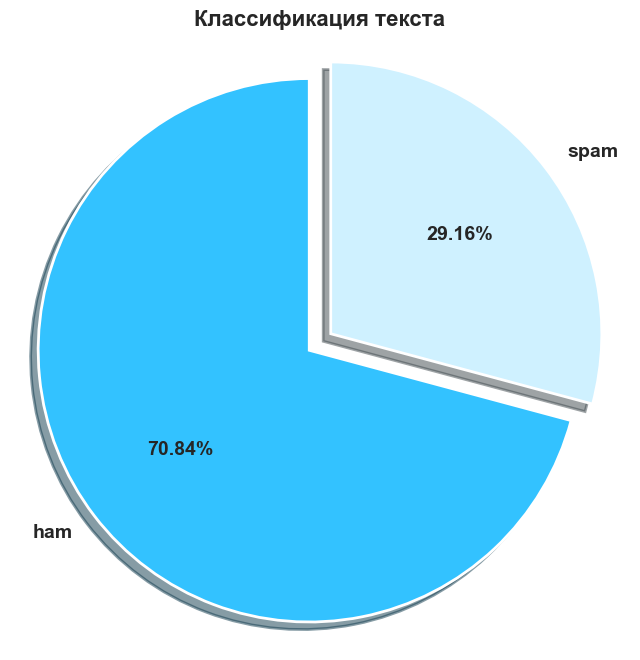

In [249]:
values = test['score'].value_counts()
colors = ['#33c2ff', '#cff1ff']
explode = (0, 0.1)  

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')


wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode, 
    shadow=True  
)


for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Классификация текста', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


Как видно оно совпадает с трейном +-

In [28]:
test

,score,text
0,ham,j jim whitehead ejw cse ucsc edu writes j you ...
1,ham,original message from bitbitch magnesium net p...
2,ham,java for managers vince durasoft who just taug...
3,ham,there is a youtuber name saiman says
4,spam,underpriced issue with high return on equity t...
...,...,...
4065,ham,husband to wifetum meri zindagi hoorwifeor kya...
4066,ham,baylor enron case study cindy yes i shall co a...
4067,ham,boring as compared to tp
4068,ham,hellogorgeous hows u my fone was on charge lst...


In [29]:
test.to_csv('submit.csv')